In [11]:
# importing the necessary libraries and the MNIST dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data")


# defining functions for the two networks.
# Both the networks have two hidden layers
# and an output layer which are densely or
# fully connected layers defining the
# Generator network function
def generator(z, reuse=None):
    with tf.variable_scope('gen', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z, units=128,
                                  activation=tf.nn.leaky_relu)

        hidden2 = tf.layers.dense(inputs=hidden1,
                                  units=128, activation=tf.nn.leaky_relu)

        output = tf.layers.dense(inputs=hidden2,
                                 units=784, activation=tf.nn.tanh)

        return output


# defining the Discriminator network function
def discriminator(X, reuse=None):
    with tf.variable_scope('dis', reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X, units=128,
                                  activation=tf.nn.leaky_relu)

        hidden2 = tf.layers.dense(inputs=hidden1,
                                  units=128, activation=tf.nn.leaky_relu)

        logits = tf.layers.dense(hidden2, units=1)
        output = tf.sigmoid(logits)

        return output, logits

    # creating placeholders for the outputs


tf.reset_default_graph()

real_images = tf.placeholder(tf.float32, shape=[None, 784])
z = tf.placeholder(tf.float32, shape=[None, 100])

G = generator(z)
D_output_real, D_logits_real = discriminator(real_images)
D_output_fake, D_logits_fake = discriminator(G, reuse=True)


# defining the loss function
def loss_func(logits_in, labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=logits_in, labels=labels_in))


# Smoothing for generalization
D_real_loss = loss_func(D_logits_real, tf.ones_like(D_logits_real) * 0.9)
D_fake_loss = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))
D_loss = D_real_loss + D_fake_loss

G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

# defining the learning rate, batch size,
# number of epochs and using the Adam optimizer
lr = 0.001  # learning rate

# Do this when multiple networks
# interact with each other

# returns all variables created(the two
# variable scopes) and makes trainable true
tvars = tf.trainable_variables()
d_vars = [var for var in tvars if 'dis' in var.name]
g_vars = [var for var in tvars if 'gen' in var.name]

D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=g_vars)

batch_size = 100  # batch size
epochs = 1000  # number of epochs. The higher the better the result
init = tf.global_variables_initializer()

# creating a session to train the networks
samples = []  # generator examples

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples // batch_size

        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images * 2 - 1
            batch_z = np.random.uniform(-1, 1, size=(batch_size, 100))
            _ = sess.run(D_trainer, feed_dict={real_images: batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})

        print("on epoch{}".format(epoch))

        sample_z = np.random.uniform(-1, 1, size=(1, 100))
        gen_sample = sess.run(generator(z, reuse=True),
                              feed_dict={z: sample_z})
#         print(gen_sample)

        samples.append(gen_sample)




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
on epoch0
on epoch1
on epoch2
on epoch3
on epoch4
on epoch5
on epoch6
on epoch7
on epoch8
on epoch9
on epoch10
on epoch11
on epoch12
on epoch13
on epoch14
on epoch15
on epoch16
on epoch17
on epoch18
on epoch19
on epoch20
on epoch21
on epoch22
on epoch23
on epoch24
on epoch25
on epoch26
on epoch27
on epoch28
on epoch29
on epoch30
on epoch31
on epoch32
on epoch33
on epoch34
on epoch35
on epoch36
on epoch37
on epoch38
on epoch39
on epoch40
on epoch41
on epoch42
on epoch43
on epoch44
on epoch45
on epoch46
on epoch47
on epoch48
on epoch49
on epoch50
on epoch51
on epoch52
on epoch53
on epoch54
on epoch55
on epoch56
on epoch57
on epoch58
on epoch59
on epoch60
on epoch61
on epoch62
on epoch63
on epoch64
on epoch65
on epoch66
on epoch67
on epoch68
on epoch69
on epoch70
on epoch71
on epoch72
on epoch73
on

on epoch676
on epoch677
on epoch678
on epoch679
on epoch680
on epoch681
on epoch682
on epoch683
on epoch684
on epoch685
on epoch686
on epoch687
on epoch688
on epoch689
on epoch690
on epoch691
on epoch692
on epoch693
on epoch694
on epoch695
on epoch696
on epoch697
on epoch698
on epoch699
on epoch700
on epoch701
on epoch702
on epoch703
on epoch704
on epoch705
on epoch706
on epoch707
on epoch708
on epoch709
on epoch710
on epoch711
on epoch712
on epoch713
on epoch714
on epoch715
on epoch716
on epoch717
on epoch718
on epoch719
on epoch720
on epoch721
on epoch722
on epoch723
on epoch724
on epoch725
on epoch726
on epoch727
on epoch728
on epoch729
on epoch730
on epoch731
on epoch732
on epoch733
on epoch734
on epoch735
on epoch736
on epoch737
on epoch738
on epoch739
on epoch740
on epoch741
on epoch742
on epoch743
on epoch744
on epoch745
on epoch746
on epoch747
on epoch748
on epoch749
on epoch750
on epoch751
on epoch752
on epoch753
on epoch754
on epoch755
on epoch756
on epoch757
on epoch758
on e

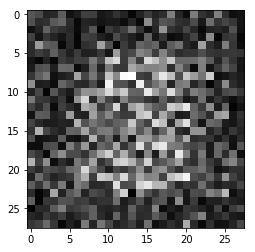

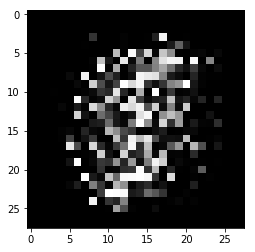

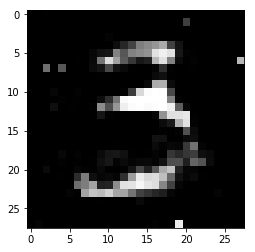

In [12]:
# result after 0th epoch
plt.imshow(samples[0].reshape(28, 28), cmap='gray')
plt.show()

# result after 499th epoch
plt.imshow(samples[499].reshape(28, 28), cmap='gray')
plt.show()

# result after 999th epoch
plt.imshow(samples[999].reshape(28, 28), cmap='gray')
plt.show()